# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

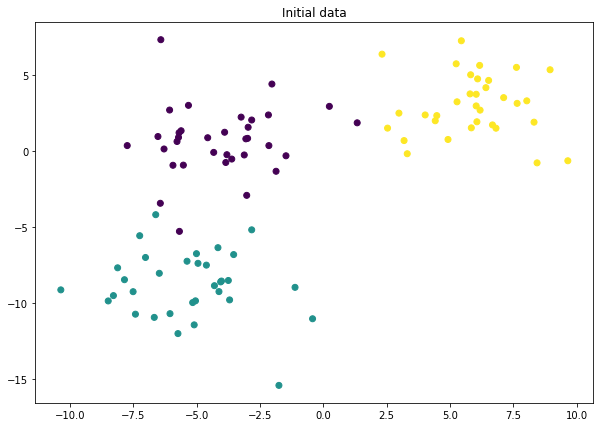

In [3]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data');

In [15]:
def calc_distance(X, Y):
    distance = 0
    try:
        len(X)
    except:
        X = np.array([X]); Y = np.array([Y])
    for i in range(len(X)):
        distance += (X[i] - Y[i])**2
    return np.sqrt(distance)

In [16]:
def knn(x_train, y_train, x_test, k, method='class'):
    """K Nearest Neighbors algorithm
    method = {'class' - classification, 'regr' - regression}
    """
    results_list = []
    for test_val in x_test:
        predict_df = pd.DataFrame(columns = ['Distance', 'Class'])
        for index, train_val in enumerate(x_train):
            predict_df.loc[index] = [calc_distance(train_val, test_val), y_train[index]]
        if method == 'class':
            k_classes = (predict_df.sort_values(['Distance'])[:k])['Class'].value_counts()
            pred_class = np.random.choice(k_classes[k_classes==max(k_classes)].index)
            results_list.append(pred_class)
        elif method == 'regr':
            pred_val = (predict_df.sort_values(['Distance'])[:k])['Class'].mean()
            results_list.append(pred_val)
    return np.array(results_list)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [6]:
h = 0.5
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [7]:
results = (knn(X, Y, np.vstack((xx.ravel(), yy.ravel())).T, k=3)).reshape(xx.shape)

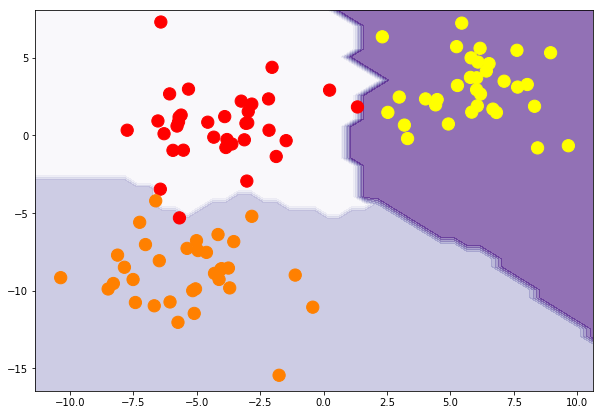

In [8]:
figure = plt.figure(figsize=(10,7))
plt.contourf(xx, yy, results,  cmap=plt.cm.Purples, alpha=.6)
plt.scatter(X[:,0], X[:,1], s=150, c = Y, cmap=plt.cm.autumn)
plt.show()

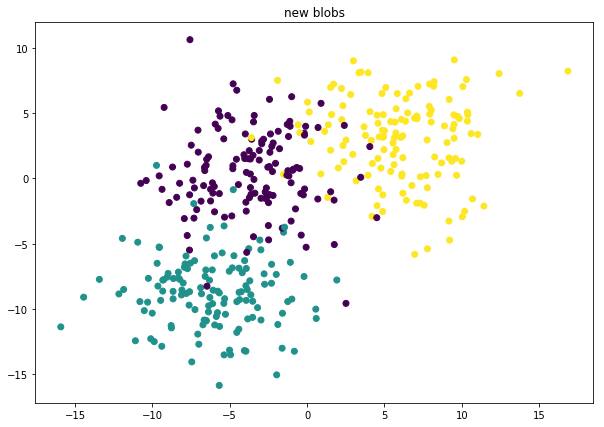

In [9]:
new_X, new_Y = make_blobs(n_samples = 400, n_features=2, centers=3, cluster_std = 3, random_state=17)
plt.figure(figsize=(10,7))
plt.scatter(new_X[:,0], new_X[:,1], c=new_Y)
plt.title('new blobs');

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

In [12]:
new_X.shape, X_train.shape, X_test.shape

((400, 2), (320, 2), (80, 2))

In [13]:
for k in [3,5,7,9]:
    knn_res = knn(X_train, y_train, X_test, k=k)
    print('KNN accuracy (k={}) = {}'.format(k, accuracy_score(y_test, knn_res)))

KNN accuracy (k=3) = 0.9
KNN accuracy (k=5) = 0.925
KNN accuracy (k=7) = 0.95
KNN accuracy (k=9) = 0.9375


Постройте разделающие поверхности, которые строит классификатор

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

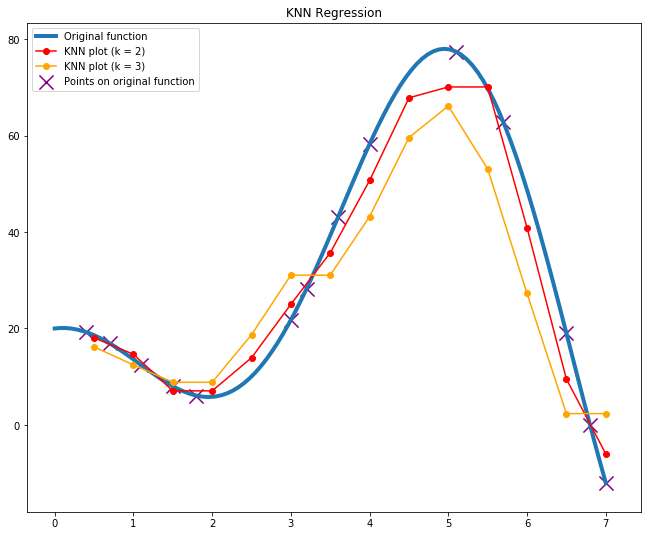

In [67]:
plt.figure(figsize=(11,9))
x_real = np.linspace(0, 7, 100)
y_real = -10 * x_real * np.sin(x_real) + 2 * x_real + 20
plt.plot(x_real, y_real, label='Original function', linewidth=4)

x = np.array([0.4, 0.7, 1.1, 1.5, 1.8, 3, 3.2, 3.6, 4.0, 5.1, 5.7, 6.5, 6.8, 7.0])
y = -10 * x * np.sin(x) + 2 * x + 20
plt.scatter(x, y, marker='x', c='purple', s=200, label='Points on original function')

for k, color in {2:'red',3:'orange'}.items():
    knn_regr_res = knn(x, y, np.arange(0.5,7.5,0.5), k=k, method='regr')
    plt.plot(np.arange(0.5,7.5,0.5), knn_regr_res, marker='o', c=color, label = 'KNN plot (k = {})'.format(k))
plt.title('KNN Regression')
plt.legend()
plt.show()

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.